In [ ]:
!pip install changeos

In [ ]:
import rasterio
import numpy as np
import changeos

In [11]:
# read in the tiled TIFF files as 3 dimension RGB numpy files
    
import rasterio
from PIL import Image

# Open the GeoTIFF file
with rasterio.open('pre_vrt_tiled_v2.tif') as src:
    
    # Read the first tile (assuming it's a 3-channel RGB image)
    tile = src.read(1, window=((0, src.block_shapes[0][0]), (0, src.block_shapes[1][0])))

    # Convert the tile to a 3-channel (RGB) image
    pre_tile_rgb = Image.fromarray(tile)
    

print(pre_tile_rgb)
 

<PIL.Image.Image image mode=L size=1024x1024 at 0x7F60E50B4190>


In [14]:
import numpy as np

# Convert the PIL image to a NumPy array
pre_tile_array = np.array(pre_tile_rgb)

# Create an empty 3-channel (RGB) array with the same dimensions
pre_rgb_array = np.empty((pre_tile_array.shape[0], pre_tile_array.shape[1], 3), dtype=np.uint8)

# Copy the grayscale channel to all three RGB channels
pre_rgb_array[:,:,0] = pre_tile_array
pre_rgb_array[:,:,1] = pre_tile_array
pre_rgb_array[:,:,2] = pre_tile_array

# Check the shape of the RGB array
print(pre_rgb_array.shape)

(1024, 1024, 3)


In [15]:
# read in the tiled TIFF files as 3 dimension RGB numpy files
    
import rasterio
from PIL import Image

# Open the GeoTIFF file
with rasterio.open('post_vrt_tiled_v2.tif') as src:
    # Read the first tile (assuming it's a 3-channel RGB image)
    
    tile = src.read(1, window=((0, src.block_shapes[0][0]), (0, src.block_shapes[1][0])))

    # Convert the tile to a 3-channel (RGB) image
    post_tile_rgb = Image.fromarray(tile)
    

print(post_tile_rgb)
 

<PIL.Image.Image image mode=L size=1024x1024 at 0x7F60E50724D0>


In [16]:
import numpy as np

# Convert the PIL image to a NumPy array
post_tile_array = np.array(post_tile_rgb)

# Create an empty 3-channel (RGB) array with the same dimensions
post_rgb_array = np.empty((post_tile_array.shape[0], post_tile_array.shape[1], 3), dtype=np.uint8)

# Copy the grayscale channel to all three RGB channels
post_rgb_array[:,:,0] = post_tile_array
post_rgb_array[:,:,1] = post_tile_array
post_rgb_array[:,:,2] = post_tile_array

# Check the shape of the RGB array
print(post_rgb_array.shape)

(1024, 1024, 3)


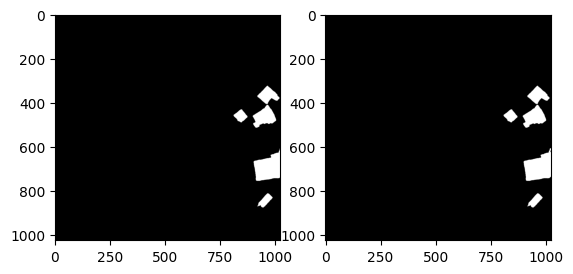

In [18]:
# constructing ChangeOS model

import changeos
# support 'changeos_r18', 'changeos_r34', 'changeos_r50', 'changeos_r101'
model = changeos.from_name('changeos_r101') # take 'changeos_r101' as example


pre_disaster_image = pre_rgb_array
post_disaster_image = post_rgb_array

# model inference
loc, dam = model(pre_disaster_image, post_disaster_image)

# put color map on raw prediction
loc, dam = changeos.visualize(loc, dam)

# visualize by matplotlib
import matplotlib.pyplot as plt
plt.subplot(121)
plt.imshow(loc)
plt.subplot(122)
plt.imshow(dam)
plt.show()

In [ ]:
#set up visualize of the tiles in RGB
# Pre / Post





In [ ]:
# Change visualize approach to something way better





In [ ]:
# Okay so that works!!!! No damage detected in that tile (which is correct!!!!)

In [ ]:
#Now:
"""
Create a for loop for each tile in the mosaics that:
 ---- gets the tiles
 ---- converts to 3D numpy array 
 ---- apply BDA (changeos)
 ---- save the dam and loc variables
 ---- append each tiled dam and loc to a new numpy array for the entire AOI (IDK if this will work)
 ---- visualize the full AOI 

BDA for entire AOI without using the Tiles!

In [2]:
# RUN BDA for entire AOI

# read in the tiled TIFF files as 3 dimension RGB numpy files
    
import rasterio
from PIL import Image
import numpy as np

# Open the GeoTIFF file
with rasterio.open('pre_vrt_tiled_v2.tif') as src:
    
    # Read the first tile (assuming it's a 3-channel RGB image)
    tile = src.read(1)

    # Convert the tile to a 3-channel (RGB) image
    pre_tile_rgb = Image.fromarray(tile)
    

print(pre_tile_rgb)


# Convert the PIL image to a NumPy array
pre_tile_array = np.array(pre_tile_rgb)

# Create an empty 3-channel (RGB) array with the same dimensions
pre_rgb_array = np.empty((pre_tile_array.shape[0], pre_tile_array.shape[1], 3), dtype=np.uint8)

# Copy the grayscale channel to all three RGB channels
pre_rgb_array[:,:,0] = pre_tile_array
pre_rgb_array[:,:,1] = pre_tile_array
pre_rgb_array[:,:,2] = pre_tile_array

# Check the shape of the RGB array
print(pre_rgb_array.shape)
 

<PIL.Image.Image image mode=L size=99328x82944 at 0x7F583133BC70>
(82944, 99328, 3)


In [3]:
# read in the tiled TIFF files as 3 dimension RGB numpy files
    
import rasterio
from PIL import Image

# Open the GeoTIFF file
with rasterio.open('post_vrt_tiled_v2.tif') as src:
    # Read the first tile (assuming it's a 3-channel RGB image)
    
    tile = src.read(1)

    # Convert the tile to a 3-channel (RGB) image
    post_tile_rgb = Image.fromarray(tile)
    

print(post_tile_rgb)

import numpy as np

# Convert the PIL image to a NumPy array
post_tile_array = np.array(post_tile_rgb)

# Create an empty 3-channel (RGB) array with the same dimensions
post_rgb_array = np.empty((post_tile_array.shape[0], post_tile_array.shape[1], 3), dtype=np.uint8)

# Copy the grayscale channel to all three RGB channels
post_rgb_array[:,:,0] = post_tile_array
post_rgb_array[:,:,1] = post_tile_array
post_rgb_array[:,:,2] = post_tile_array

# Check the shape of the RGB array
print(post_rgb_array.shape)
 

<PIL.Image.Image image mode=L size=99328x82944 at 0x7F5838E4BFA0>
(82944, 99328, 3)


In [ ]:
# constructing ChangeOS model for the entire AOI

import changeos
# support 'changeos_r18', 'changeos_r34', 'changeos_r50', 'changeos_r101'
model = changeos.from_name('changeos_r101') # take 'changeos_r101' as example


pre_disaster_image = pre_rgb_array
post_disaster_image = post_rgb_array

# model inference
loc, dam = model(pre_disaster_image, post_disaster_image)

# put color map on raw prediction
loc, dam = changeos.visualize(loc, dam)

# visualize by matplotlib
import matplotlib.pyplot as plt
plt.subplot(121)
plt.imshow(loc)
plt.subplot(122)
plt.imshow(dam)
plt.show()